In [7]:
import numpy as np

SprintSpeed = np.array([12, 14.5, 10, 18, 8.5, 15, 22, 11, 13, 20.5, 24, 16, 12.5, 28, 9, 25, 14, 19, 10.5, 26.5, 15.5, 17])

mu_ss = np.mean(SprintSpeed)
sigma_ss = np.std(SprintSpeed)
SprintSpeed_scaled = (SprintSpeed - mu_ss) / sigma_ss
SprintSpeed_reshaped = SprintSpeed_scaled.reshape(-1, 1)

AmmoClips = np.array([0, 1, 2, 0, 4, 1, 0, 5, 2, 1, 2, 3, 0, 0, 6, 1, 4, 2, 2, 2, 5, 3])

mu_aa = np.mean(AmmoClips)
sigma_aa = np.std(AmmoClips)
AmmoClips_scaled = (AmmoClips - mu_aa) / sigma_aa
AmmoClips_reshaped = AmmoClips_scaled.reshape(-1, 1)

ones = np.ones((22, 1))

X = np.hstack((ones, SprintSpeed_reshaped, AmmoClips_reshaped))

Result = np.array([0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1])
y_true = Result.reshape(-1, 1)

theta = np.array([0, 0, 0])
theta = theta.reshape(-1, 1)

In [8]:
def sigmoid(X, theta):
    return 1/(1 + np.exp(-np.dot(X, theta)))

In [19]:
import numpy as np

alpha = 0.0001
iterations = 10000000
costs_history = []
sample_interval = 10000

theta = np.array([0, 0, 0])
theta = theta.reshape(-1, 1)

for i in range(iterations):
  theta = theta - (alpha/len(y_true))*(X.T @ (sigmoid(X, theta) - y_true))

  if i % sample_interval == 0:
    h = sigmoid(X, theta)
    h = np.clip(h, 1e-10, 1 - 1e-10)
    cost = -(1/len(y_true)) * np.sum(y_true * np.log(h) + (1 - y_true) * np.log(1 - h))
    costs_history.append(cost)

h = sigmoid(X, theta)
h = np.clip(h, 1e-10, 1 - 1e-10)
final_cost = -(1/len(y_true)) * np.sum(y_true * np.log(h) + (1 - y_true) * np.log(1 - h))

print(f"Final cost: {final_cost}")
print(f"Final theta: {theta}")

Final cost: 0.008198135754037446
Final theta: [[1.97407843]
 [9.39353228]
 [6.70839237]]


In [20]:
x1 = 25
x2 = 1

x1_scaled = (x1 - mu_ss) / sigma_ss
x2_scaled = (x2 - mu_aa) / sigma_aa

x_predict = np.array([[1, x1_scaled, x2_scaled]])

prediction_probability = sigmoid(x_predict, theta)
predicted_class = 1 if prediction_probability >= 0.5 else 0

print(f"For SprintSpeed={x1} and AmmoClip={x2}:")
print(f"Scaled SprintSpeed: {x1_scaled:.4f}")
print(f"Scaled AmmoClip: {x2_scaled:.4f}")
print(f"Prediction Probability: {prediction_probability[0][0]:.4f}")
print(f"Predicted Class: {predicted_class}")

For SprintSpeed=25 and AmmoClip=1:
Scaled SprintSpeed: 1.5118
Scaled AmmoClip: -0.6213
Prediction Probability: 1.0000
Predicted Class: 1


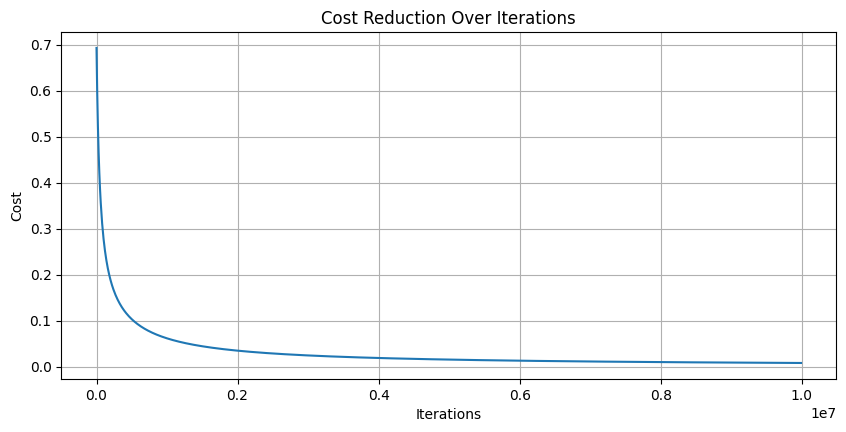

In [23]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 4.5))
plt.plot(np.arange(0, iterations, sample_interval), costs_history)
plt.xlabel("Iterations")
plt.ylabel("Cost")
plt.title("Cost Reduction Over Iterations")
plt.grid(True)
plt.show()

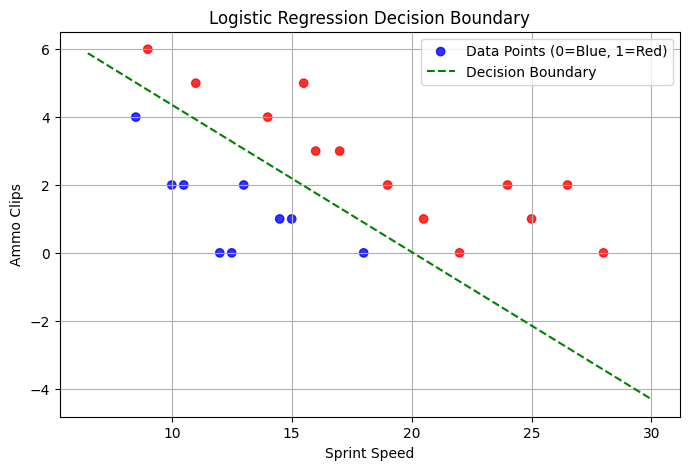

In [28]:
theta0 = theta[0, 0]
theta1 = theta[1, 0]
theta2 = theta[2, 0]

A = theta1 / sigma_ss
B = theta2 / sigma_aa
C = theta0 - (theta1 * mu_ss / sigma_ss) - (theta2 * mu_aa / sigma_aa)

x1_boundary = np.linspace(min(SprintSpeed) - 2, max(SprintSpeed) + 2, 100)

if abs(B) < 1e-6:
    if abs(A) > 1e-6:
        x2_boundary = np.linspace(min(AmmoClips) - 2, max(AmmoClips) + 2, 100)
        x1_boundary = np.full_like(x2_boundary, -C/A)
    else:
        x2_boundary = []
        x1_boundary = []
else:
    x2_boundary = (-A * x1_boundary - C) / B


plt.figure(figsize=(8, 5))

colors = np.where(Result == 0, 'blue', 'red')
plt.scatter(SprintSpeed, AmmoClips, c=colors, label='Data Points (0=Blue, 1=Red)', alpha=0.8)

if len(x1_boundary) > 0:
    plt.plot(x1_boundary, x2_boundary, color='green', linestyle='--', label='Decision Boundary')

plt.xlabel("Sprint Speed")
plt.ylabel("Ammo Clips")
plt.title("Logistic Regression Decision Boundary")
plt.legend()
plt.grid(True)
plt.show()